# Introduction

This is my submission to the final project of the Python for Research course, ran by Harvard edX.

### Project Aim
The goal of this project is to predict the type of physical activity from tri-axial smartphone accelerometer data. 

### Input Data
The input data we are using consists of two files: <br>
*train_time_series.csv* :- the raw accelerometer data <br>
*train_labels.csv* :- the activity labels
#### Activity Labels Key
1 = standing <br>
2 = walking <br>
3 = stairs down <br>
4 = stairs up <br>

### Remarks
Before we begin, I would like to note down a few important points that will determine how we tackle this problem. <br>
When we think about the model we are trying to build, we know that this model will take in some inputs and spit out some outputs; but what are these inputs and outputs? <br>
The **inputs** are the acceleration vectors **x** , **y** & **z**. <br> *The timestamp could also be useful, since it tells us how far apart readings were. For example, if a reading produces an output of 4 (stairs up), the likelihood of the following reading being the same is high.* <br> 
The **output** is an integer in the range 1,2,3,4, representing the type of physical activity that is occurring at that time. <br>
#### The Chosen Model
Since this output is discrete, the problem is a regression problem.<br>
Since there are more than two discrete outputs, or classes, this is **not** a binary classification problem, and so we should not use a Logistic Regression model. <br>
From the models we have used in the course, our best (& only) choice for this problem is the Random Forest Classifier.

In [1]:
# Begin by importing the libraries we will require for this project.
import numpy as np
import pandas as pd
import scipy.stats as ss

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

Now, we will read the data into a Pandas dataframe and get a feel for it by print out the first 5 rows.

In [17]:
data = pd.read_csv("train_time_series.csv")
# Drop the unwanted ID column 
data.drop(data.columns[0],axis=1,inplace=True)
print(data.shape)
data.head()

(3744, 6)


,timestamp,UTC time,accuracy,x,y,z
0,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [19]:
labels = pd.read_csv("train_labels.csv")
# Drop the unwanted ID column 
labels.drop(labels.columns[0],axis=1,inplace=True)
print(labels.shape)
labels.head()

(375, 3)


,timestamp,UTC time,label
0,1565109931087,2019-08-06T16:45:31.087,1
1,1565109932090,2019-08-06T16:45:32.090,1
2,1565109933092,2019-08-06T16:45:33.092,1
3,1565109934094,2019-08-06T16:45:34.094,1
4,1565109935097,2019-08-06T16:45:35.097,1


### Visualisation
Lets start by visualising the accelerometer data in 3-dimensional space.

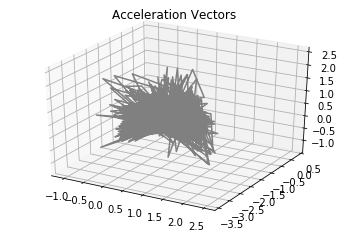

In [20]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
z = data['z']
x = data['x']
y = data['y']
ax.plot3D(x, y, z, 'gray')
ax.set_title('Acceleration Vectors')
plt.show()